In [1]:
import pandas as pd
import re
from sqlalchemy import create_engine, inspect
import os
import dotenv
import matplotlib.pyplot as plt
import numpy as np

# Load environment variables from .env file
dotenv.load_dotenv()

True

##### Database


In [2]:
class PostgresManager:
    def __init__(self, host, port, dbname, user, password):
        self.db_params = {
            'host': host,
            'port': port,
            'dbname': dbname,
            'user': user,
            'password': password
        }
        self.engine_str = (
            f"postgresql://{user}:{password}@{host}:{port}/{dbname}"
        )
        self.engine = create_engine(self.engine_str)
        print("✅ PostgreSQL connection initialized.")

    def upload_dataframe(self, df: pd.DataFrame, table_name: str, if_exists='replace'):
        """
        Uploads a DataFrame to PostgreSQL.
        - if_exists: 'replace', 'append', or 'fail'
        """
        try:
            df.to_sql(table_name, self.engine, if_exists=if_exists, index=False, method='multi')
            print(f"✅ Data uploaded to table '{table_name}'.")
        except Exception as e:
            print(f"❌ Failed to upload to '{table_name}': {e}")
    
    def getTicker30MinData(self, ticker: str) -> pd.DataFrame:
        """
        Retrieves 30-minute interval data for a given ticker from PostgreSQL
        """
        table_name = f"{ticker.upper()}_30MinData"
        try:
            query = f"SELECT * FROM \"{table_name}\""
            df = pd.read_sql_query(query, self.engine)
            
            # Convert 'date' column to datetime and set as index
            if 'date' in df.columns:
                df['date'] = pd.to_datetime(df['date'])
                df.set_index('date', inplace=True)
                df.sort_index(inplace=True)
                print(f"✅ Retrieved {len(df)} rows of 30-min data for {ticker}")
            else:
                print(f"❌ 'date' column missing in table {table_name}")
            return df
        except Exception as e:
            print(f"❌ Failed to fetch data for {ticker}: {e}")
            return pd.DataFrame()
    def getTickerEODData(self, ticker: str) -> pd.DataFrame:
        """
        Retrieves EOD data for a given ticker from PostgreSQL
        """
        table_name = f"{ticker.upper()}_EOD_Data"
        try:
            query = f"SELECT * FROM \"{table_name}\""
            df = pd.read_sql_query(query, self.engine)
            
            # Convert 'date' column to datetime and set as index
            if 'date' in df.columns:
                df['date'] = pd.to_datetime(df['date'])
                df.set_index('date', inplace=True)
                df.sort_index(inplace=True)
                print(f"✅ Retrieved {len(df)} rows of EOD data for {ticker}")
            else:
                print(f"❌ 'date' column missing in table {table_name}")
            return df
        except Exception as e:
            print(f"❌ Failed to fetch data for {ticker}: {e}")
            return pd.DataFrame()
    
    def getTickerFundamentalsData(self, ticker: str) -> pd.DataFrame:
        """
        Retrieves fundamentals data for a given ticker from PostgreSQL
        """
        table_name = f"{ticker.upper()}_FundamentalsData"
        try:
            query = f"SELECT * FROM \"{table_name}\""
            df = pd.read_sql_query(query, self.engine)
            
            # Convert 'date' column to datetime and set as index
            if 'date' in df.columns:
                df['date'] = pd.to_datetime(df['date'])
                df.set_index('date', inplace=True)
                df.sort_index(inplace=True)
                print(f"✅ Retrieved {len(df)} rows of fundamentals data for {ticker}")
            else:
                print(f"❌ 'date' column missing in table {table_name}")
            return df
        except Exception as e:
            print(f"❌ Failed to fetch data for {ticker}: {e}")
            return pd.DataFrame()
    def getTickerCombinedData(self, ticker: str) -> pd.DataFrame:
        """
        Retrieves combined data for a given ticker from PostgreSQL
        """
        table_name = f"{ticker.upper()}_CombinedData"
        try:
            query = f"SELECT * FROM \"{table_name}\""
            df = pd.read_sql_query(query, self.engine)
            
            # Convert 'date' column to datetime and set as index
            if 'date' in df.columns:
                df['date'] = pd.to_datetime(df['date'])
                df.set_index('date', inplace=True)
                df.sort_index(inplace=True)
                print(f"✅ Retrieved {len(df)} rows of combined data for {ticker}")
            else:
                print(f"❌ 'date' column missing in table {table_name}")
            return df
        except Exception as e:
            print(f"❌ Failed to fetch data for {ticker}: {e}")
            return pd.DataFrame()
        
    def get_tickers_from_30min_tables(self):
        """
        Extracts all tickers from tables that match the {ticker}_30MinData format.
        """
        try:
            inspector = inspect(self.engine)
            all_tables = inspector.get_table_names()
            pattern = re.compile(r'^(.*)_30MinData$', re.IGNORECASE)
            tickers = [match.group(1).upper() for table in all_tables if (match := pattern.match(table))]
            return tickers
        except Exception as e:
            print(f"❌ Failed to inspect tables: {e}")
            return []
    def get_tickers_from_EOD_tables(self):
        """
        Extracts all tickers from tables that match the {ticker}_30MinData format.
        """
        try:
            inspector = inspect(self.engine)
            all_tables = inspector.get_table_names()
            pattern = re.compile(r'^(.*)_EOD_Data$', re.IGNORECASE)
            tickers = [match.group(1).upper() for table in all_tables if (match := pattern.match(table))]
            return tickers
        except Exception as e:
            print(f"❌ Failed to inspect tables: {e}")
            return []
        
    def get_tickers_from_Fundamentals_tables(self):
        """
        Extracts all tickers from tables that match the {ticker}_Fundamentals format.
        """
        try:
            inspector = inspect(self.engine)
            all_tables = inspector.get_table_names()
            pattern = re.compile(r'^(.*)_FundamentalsData$', re.IGNORECASE)
            tickers = [match.group(1).upper() for table in all_tables if (match := pattern.match(table))]
            return tickers
        except Exception as e:
            print(f"❌ Failed to inspect tables: {e}")
            return []
    
    def get_tickers_from_combined_tables(self):
        try:
            inspector = inspect(self.engine)
            all_tables = inspector.get_table_names()
            pattern = re.compile(r'^(.*)_CombinedData$', re.IGNORECASE)
            tickers = [match.group(1).upper() for table in all_tables if (match := pattern.match(table))]
            return tickers
        except Exception as e:
            print(f"❌ Failed to inspect tables: {e}")
            return []

In [3]:
pg = PostgresManager(
    host=os.getenv('host'),
    port=os.getenv('port'),
    dbname=os.getenv('dbname'),
    user=os.getenv('user'),
    password=os.getenv('password')
)

✅ PostgreSQL connection initialized.


##### Getting SPY (S&P500) Data for Benchmark


In [4]:
#getting the SPY_EOD_Data
spy_eod_data = pg.getTickerEODData('SPY')

✅ Retrieved 8145 rows of EOD data for SPY


##### Getting Analyzing a Single Portfolio


Latest date in portfolioData: 2025-05-21 00:00:00
Index(['Unnamed: 0', 'CVS_close', 'CVS_return', 'CVS_sharpe', 'CVS_volatility',
       'AAPL_close', 'AAPL_return', 'AAPL_sharpe', 'AAPL_volatility',
       'MSFT_close',
       ...
       'ZS_position', 'ZTS_weight', 'ZTS_position', 'ZWS_weight',
       'ZWS_position', 'portfolio_return', 'symbol', 'open', 'close',
       'volume'],
      dtype='object', length=5874)


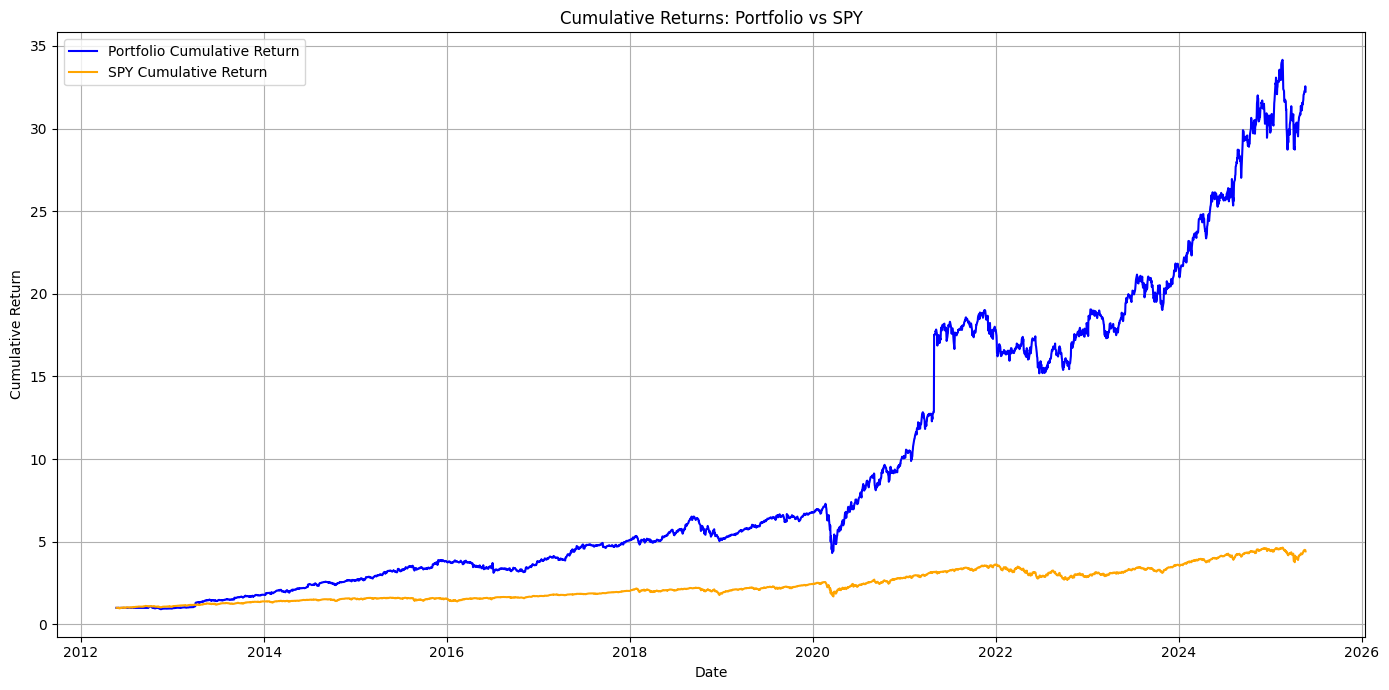

In [10]:
portfolioData = pd.read_csv('optimDf_0.25_25 (1).csv', parse_dates=['date'])
#joining the spy_eod_data with portfolioData on only the dates portfolioData has
#printing the latest date in portfolioData
print(f"Latest date in portfolioData: {portfolioData['date'].max()}")
portfolioData['date'] = pd.to_datetime(portfolioData['date'])
#make portfolioData 80% of it's orginial size
# portfolioData = portfolioData[portfolioData['date'] <= '2025-05-21']
# portfolioData = portfolioData[portfolioData['date'] >= '2012-05-21']
portfolioData.set_index('date', inplace=True)
portfolioData = portfolioData.join(spy_eod_data, how='inner', rsuffix='_spy')
print(portfolioData.columns)
#calculating the returns
portfolioData['portfolioCumulativeReturn']= (1+portfolioData['portfolio_return']).cumprod()
portfolioData['spyReturn'] = portfolioData['close'].pct_change()
portfolioData['spyCumulativeReturn'] = (1 + portfolioData['spyReturn']).cumprod()

# Plotting the cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(portfolioData.index, portfolioData['portfolioCumulativeReturn'], label='Portfolio Cumulative Return', color='blue')
plt.plot(portfolioData.index, portfolioData['spyCumulativeReturn'], label='SPY Cumulative Return', color='orange')
plt.title('Cumulative Returns: Portfolio vs SPY')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('cumulative_returns.png')
plt.show()


In [112]:
#create a column called total_weight that is the sum of all weights in portfolioData
portfolioData['total_weight'] = portfolioData.filter(like='_weight').sum(axis=1)
#print the days for which total_weight is not equal to 1
portfolioData['total_weight'].to_csv('total_weight.csv')

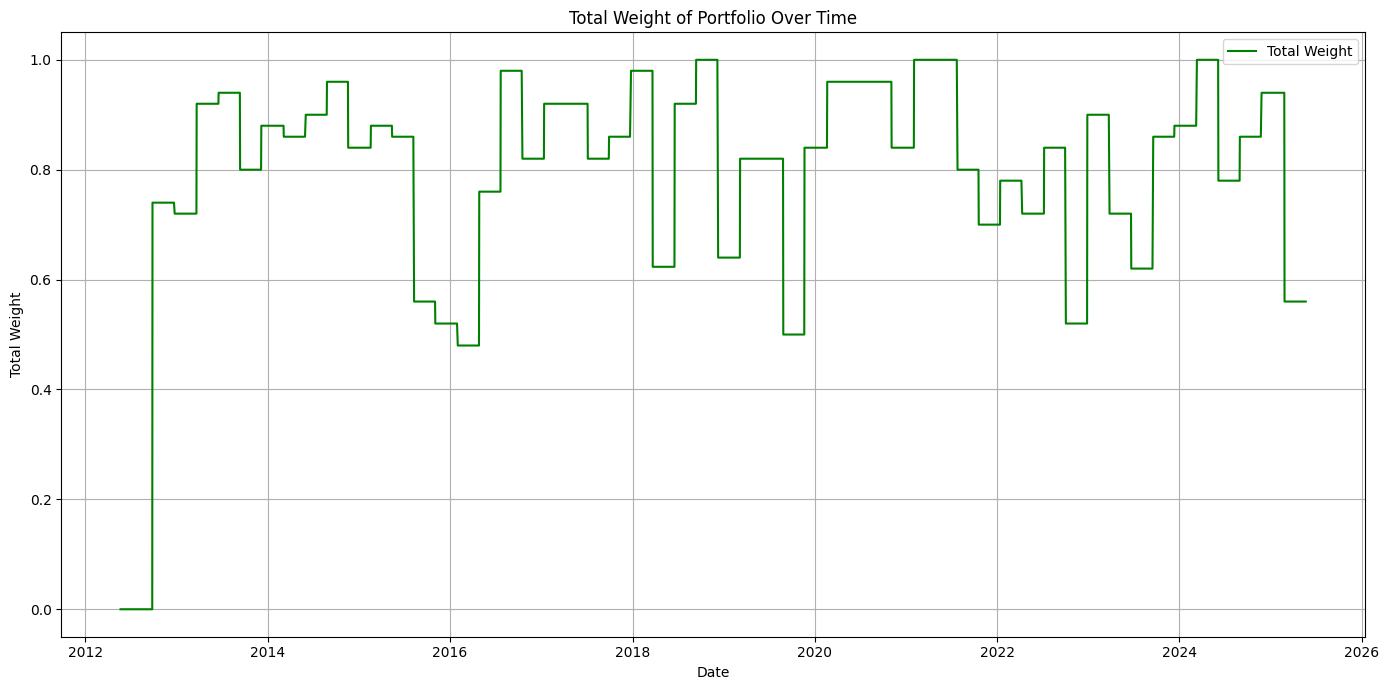

In [113]:
#plot portfolioData['total_weight'] 
total_weight = portfolioData['total_weight'].dropna()
plt.figure(figsize=(14, 7))
plt.plot(portfolioData.index, total_weight, label='Total Weight', color='green')
plt.title('Total Weight of Portfolio Over Time')
plt.xlabel('Date')
plt.ylabel('Total Weight')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('total_weight.png')
plt.show()

In [ ]:
#comparing portfolioData sharpe and spy_eod_data sharpe
portfolio_sharpe = (portfolioData['portfolio_return'].mean() / portfolioData['portfolio_return'].std())* np.sqrt(252)
spy_sharpe = (spy_eod_data['returns'].mean() / spy_eod_data['returns'].std())* np.sqrt(252)
print(f"Portfolio Sharpe Ratio: {portfolio_sharpe:.4f}")
print(f"SPY Sharpe Ratio: {spy_sharpe:.4f}")

#compare the max drawdown of portfolioData and spy_eod_data
def max_drawdown(returns):
    cumulative = (1 + returns).cumprod()
    peak = cumulative.cummax()
    drawdown = (cumulative - peak) / peak
    return drawdown.min()
portfolio_max_drawdown = max_drawdown(portfolioData['portfolio_return'])
spy_max_drawdown = max_drawdown(spy_eod_data['returns'])
print(f"Portfolio Max Drawdown: {portfolio_max_drawdown:.4f}")
print(f"SPY Max Drawdown: {spy_max_drawdown:.4f}")

Portfolio Sharpe Ratio: 1.2195
SPY Sharpe Ratio: 0.5247
Portfolio Max Drawdown: -0.4085
SPY Max Drawdown: -0.5647


In [116]:
print(f"increased the sharpe ratio percentage: {((portfolio_sharpe - spy_sharpe) / spy_sharpe) * 100:.2f}%")
print(f"decreased the max drawdown percentage: {((spy_max_drawdown - portfolio_max_drawdown) / abs(spy_max_drawdown)) * 100:.2f}%")

increased the sharpe ratio percentage: 132.39%
decreased the max drawdown percentage: -27.67%


In [ ]:
#get all the columns and save it as a txt file
with open('portfolio_columns.txt', 'w') as f:
    for column in portfolioData.columns:
        f.write(f"{column}\n")

##### Analayzing Multiple Portfolios


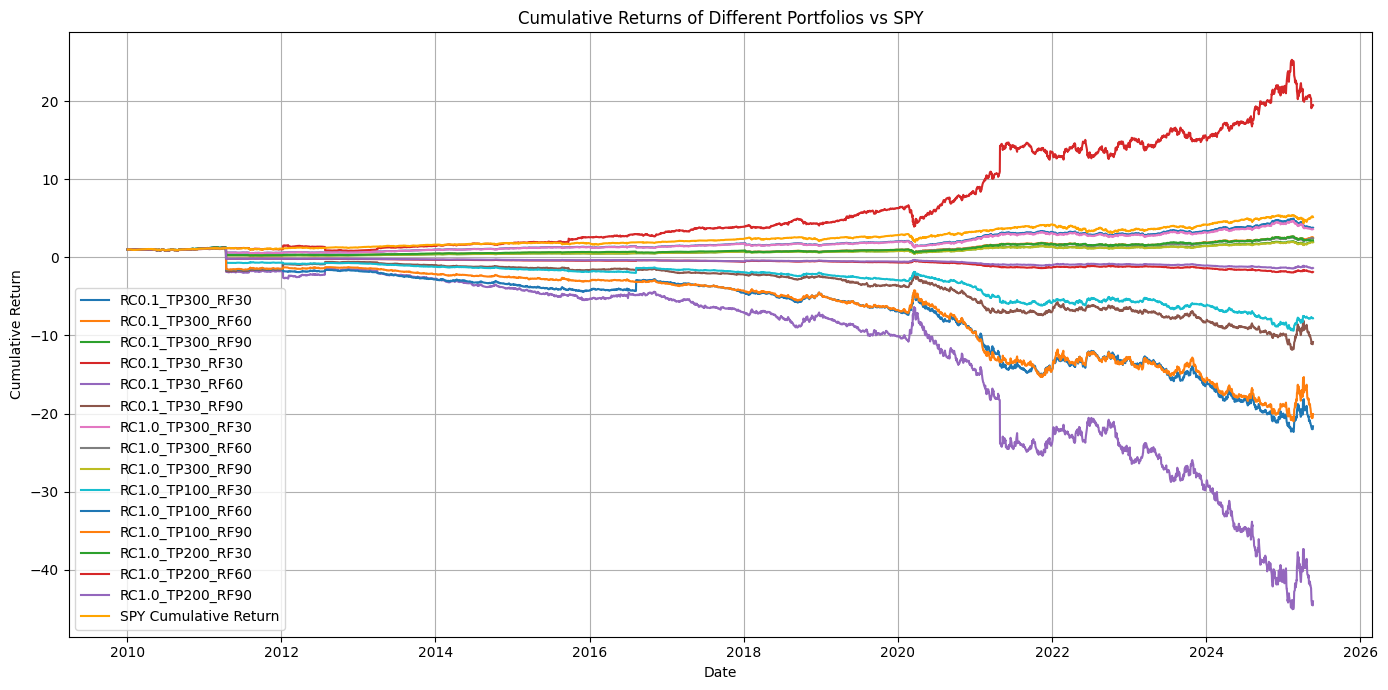

In [13]:
allReturns = pd.DataFrame()
foundFiles = []
for risk_coeff in [0.1,1.0, 0.5, 2.0]:
  for top_pairs in [300, 100, 200, 30 ]:
    # Use integer values for rebalance_freq
    for rebalance_freq in [30, 60, 90]:
        fileName = f"optimDfs/optimDf_RC{risk_coeff}_TP{top_pairs}_RF{rebalance_freq}.csv"
        #try opening the file, otherwise print that it was not found
        if os.path.exists(fileName):
            #opening the file
            df = pd.read_csv(fileName, parse_dates=['date'])
            #set the index to date
            df.set_index('date', inplace=True)
            #get the portfolio_return column
            df['portfolio_return'] = df['portfolio_return'].astype(float)
            #get the cumulative return
            df['cumulative_return'] = (1 + df['portfolio_return']).cumprod()
            #add it to the dataframe
            allReturns[f'RC{risk_coeff}_TP{top_pairs}_RF{rebalance_freq}'] = df['cumulative_return']
            foundFiles.append(fileName)

#only keep the rows of spy_eod_data that are in allReturns
spy_eod_data = spy_eod_data[spy_eod_data.index.isin(allReturns.index)]
#getting the returns from the close of spy_eod_data
spy_eod_data['returns'] = spy_eod_data['close'].pct_change()


# Plotting all cumulative returns and spy EOD data
plt.figure(figsize=(14, 7))
for column in allReturns.columns:
    plt.plot(allReturns.index, allReturns[column], label=column)
plt.plot(spy_eod_data.index, (1 + spy_eod_data['returns']).cumprod(), label='SPY Cumulative Return', color='orange')
plt.title('Cumulative Returns of Different Portfolios vs SPY')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('all_cumulative_returns.png')
plt.show()  
            
            

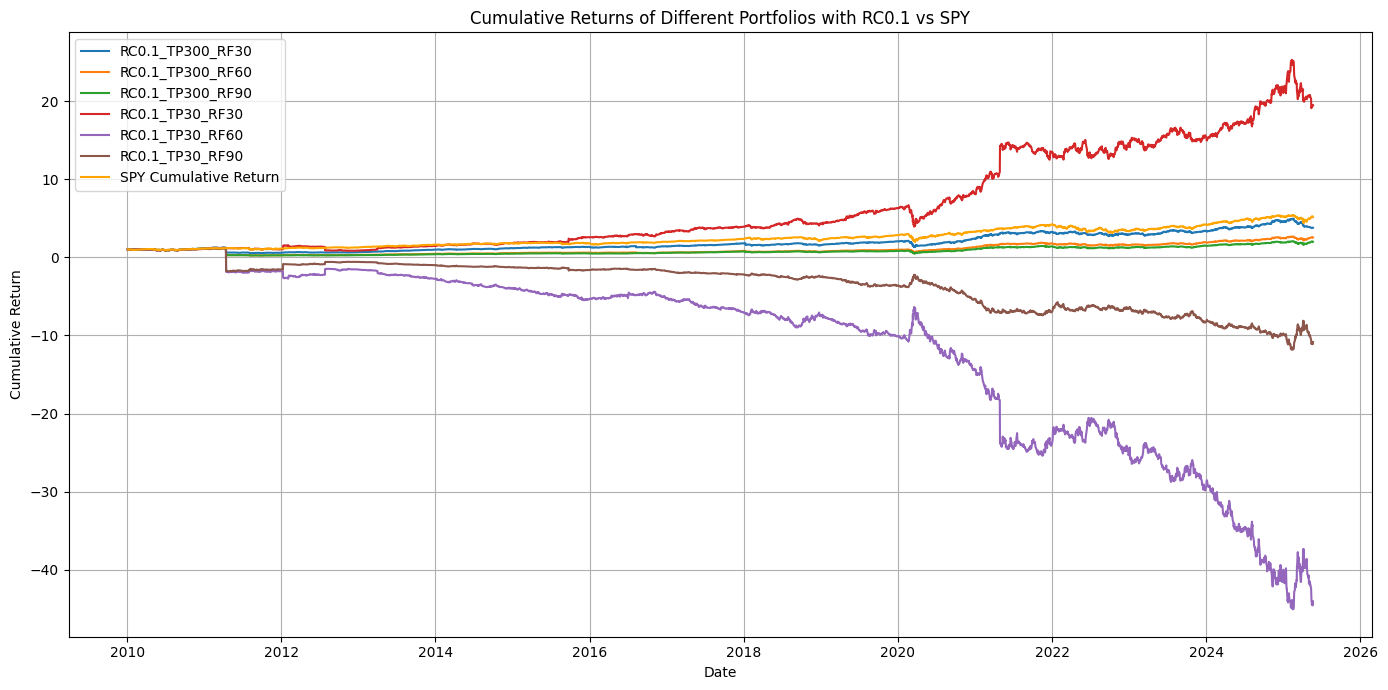

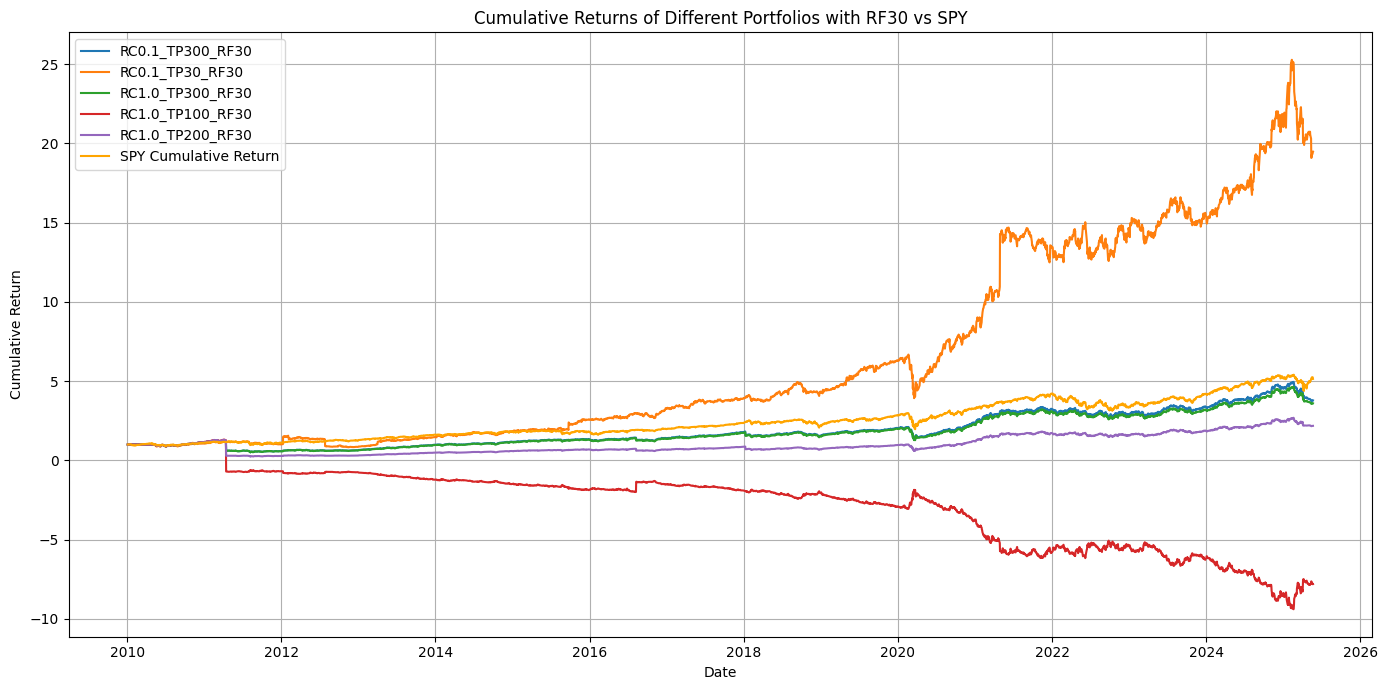

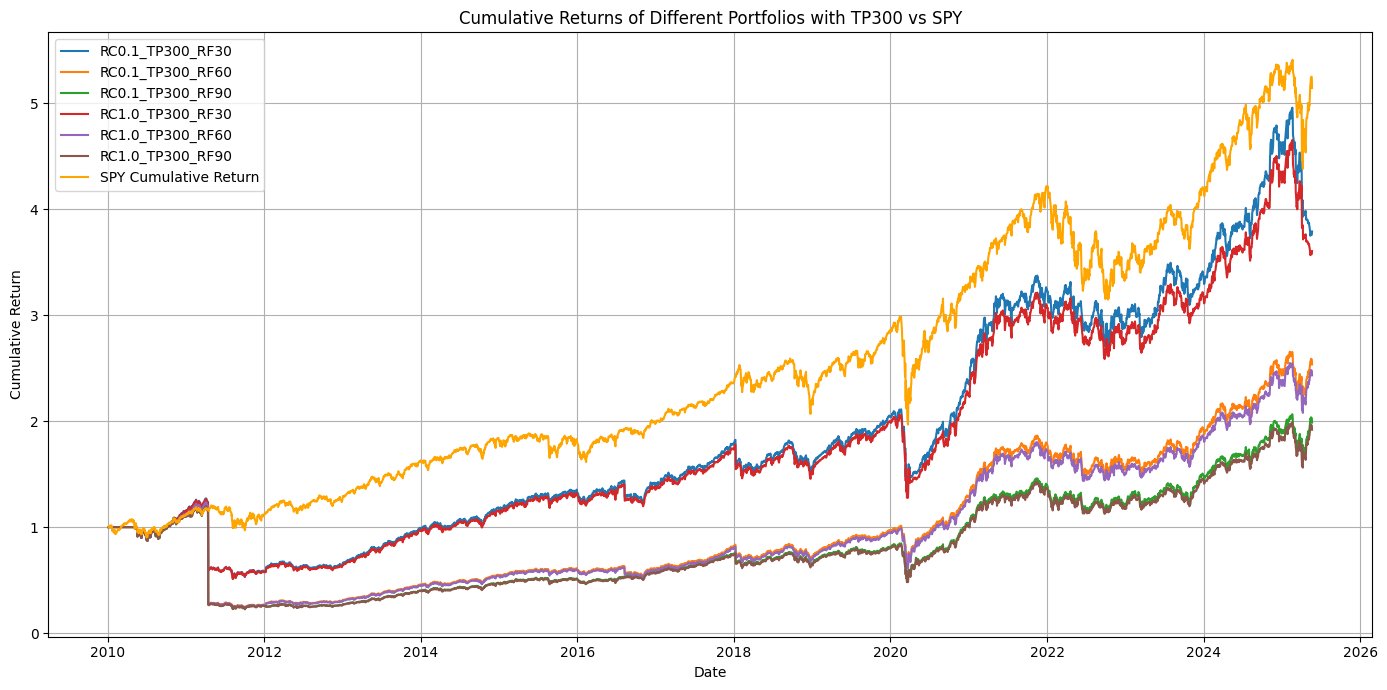

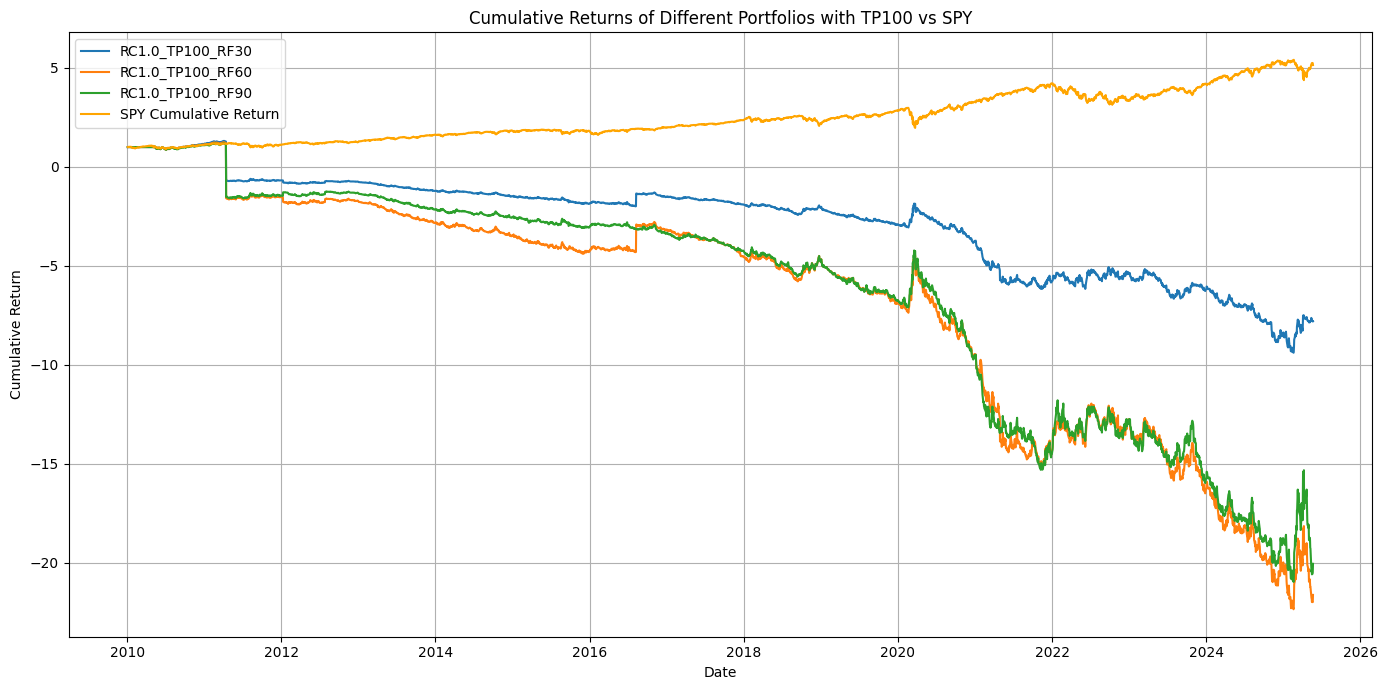

In [ ]:
def plotSubSectionPortfolio(allReturnsDf, spyEODData, condition):
    plt.figure(figsize=(14, 7))
    for column in allReturnsDf.columns:
        #if the column contains the string 'RC0.1' then plot it
        if condition in column:
            plt.plot(allReturns.index, allReturns[column], label=column)
    plt.plot(spyEODData.index, (1 + spyEODData['returns']).cumprod(), label='SPY Cumulative Return', color='orange')
    plt.title(f'Cumulative Returns of Different Portfolios with {condition} vs SPY')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.savefig('all_cumulative_returns.png')
    plt.show()  
    
plotSubSectionPortfolio(allReturns, spy_eod_data, 'RC0.1') #low Risk Coefficient
plotSubSectionPortfolio(allReturns, spy_eod_data, 'RF30')  #low Rebalance Frequency
plotSubSectionPortfolio(allReturns, spy_eod_data, 'TP300')  #high Top Pairs
plotSubSectionPortfolio(allReturns, spy_eod_data, 'TP100')  #medium Top Pairs
    

##### Analyzing Portfolio


Latest date in portfolioData: 2025-05-21 00:00:00
Index(['Unnamed: 0', 'CVS_close', 'CVS_return', 'AAPL_close', 'AAPL_return',
       'MSFT_close', 'MSFT_return', 'NVDA_close', 'NVDA_return', 'AMZN_close',
       ...
       'ZTS_weight', 'ZTS_position', 'ZWS_weight', 'ZWS_position',
       'portfolio_return', 'symbol', 'open', 'close', 'volume', 'returns'],
      dtype='object', length=3923)


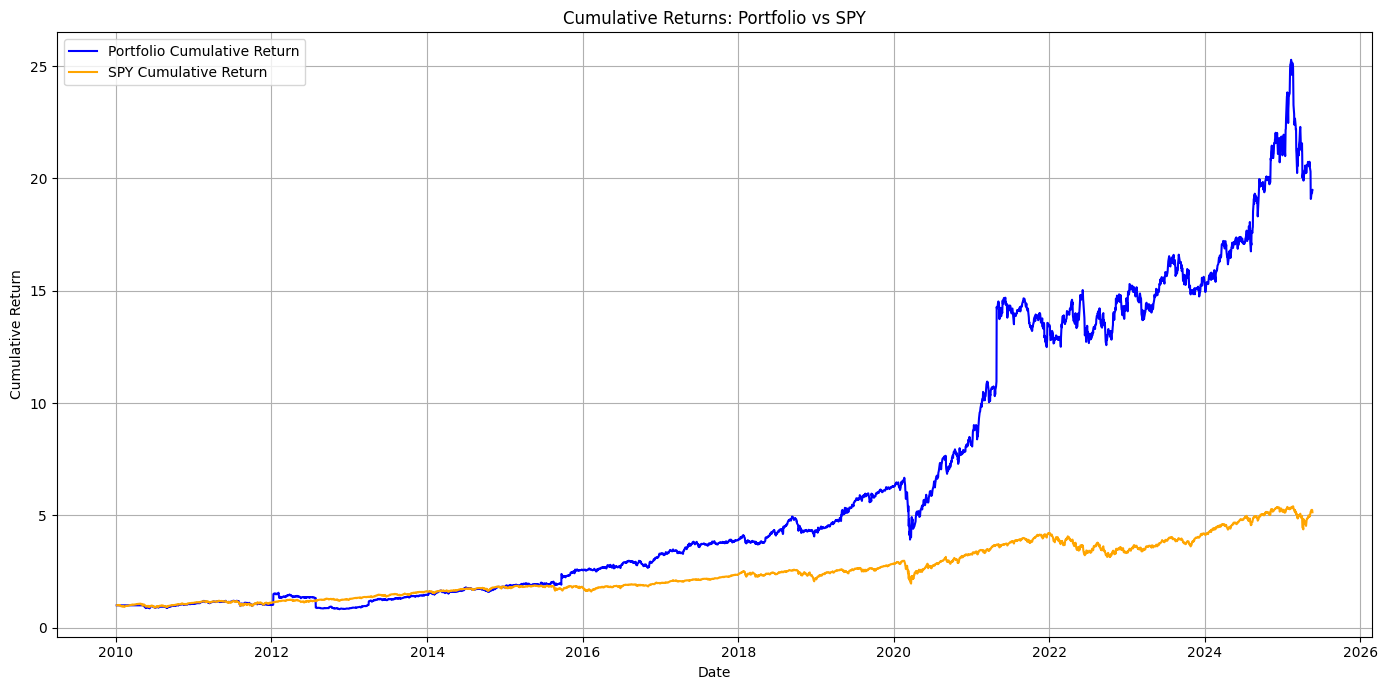

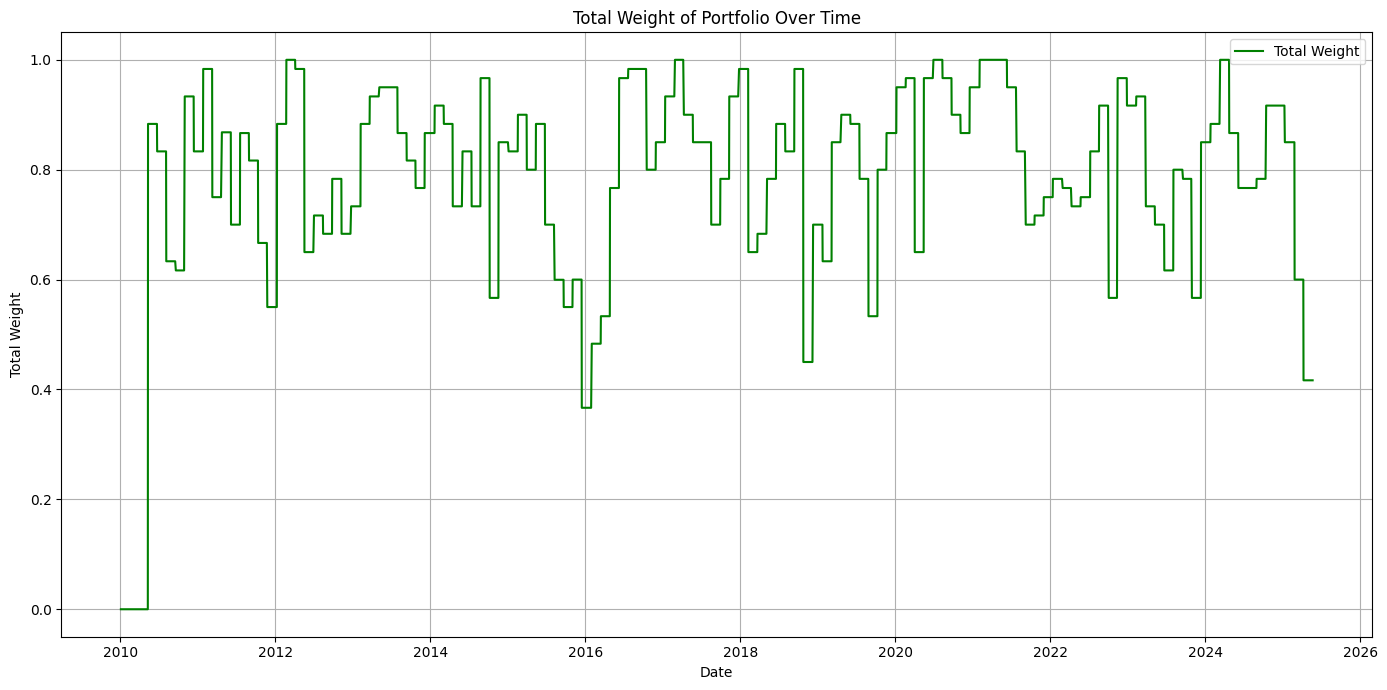

Portfolio Sharpe Ratio: 0.8396
SPY Sharpe Ratio: 0.6982
Portfolio Max Drawdown: -0.4708
SPY Max Drawdown: -0.3410


In [20]:
def plotPortfolio(risk_coeff, top_pairs, rebalance_freq):
    
    fileName = f"optimDfs/optimDf_RC{risk_coeff}_TP{top_pairs}_RF{rebalance_freq}.csv"
    try:
        portfolioData = pd.read_csv(fileName, parse_dates=['date'])
    except:
        print(f"File {fileName} not found. Skipping...")
        return
    #joining the spy_eod_data with portfolioData on only the dates portfolioData has
    #printing the latest date in portfolioData
    print(f"Latest date in portfolioData: {portfolioData['date'].max()}")
    portfolioData['date'] = pd.to_datetime(portfolioData['date'])
    #make portfolioData 80% of it's orginial size
    # portfolioData = portfolioData[portfolioData['date'] <= '2025-05-21']
    # portfolioData = portfolioData[portfolioData['date'] >= '2012-05-21']
    portfolioData.set_index('date', inplace=True)
    portfolioData = portfolioData.join(spy_eod_data, how='inner', rsuffix='_spy')
    print(portfolioData.columns)
    #calculating the returns
    portfolioData['portfolioCumulativeReturn']= (1+portfolioData['portfolio_return']).cumprod()
    portfolioData['spyReturn'] = portfolioData['close'].pct_change()
    portfolioData['spyCumulativeReturn'] = (1 + portfolioData['spyReturn']).cumprod()

    # Plotting the cumulative returns
    plt.figure(figsize=(14, 7))
    plt.plot(portfolioData.index, portfolioData['portfolioCumulativeReturn'], label='Portfolio Cumulative Return', color='blue')
    plt.plot(portfolioData.index, portfolioData['spyCumulativeReturn'], label='SPY Cumulative Return', color='orange')
    plt.title('Cumulative Returns: Portfolio vs SPY')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.savefig('cumulative_returns.png')
    plt.show()


    #create a column called total_weight that is the sum of all weights in portfolioData
    portfolioData['total_weight'] = portfolioData.filter(like='_weight').sum(axis=1)
    #plot portfolioData['total_weight'] 
    total_weight = portfolioData['total_weight'].dropna()
    plt.figure(figsize=(14, 7))
    plt.plot(portfolioData.index, total_weight, label='Total Weight', color='green')
    plt.title('Total Weight of Portfolio Over Time')
    plt.xlabel('Date')
    plt.ylabel('Total Weight')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.savefig('total_weight.png')
    plt.show()
    
    #comparing portfolioData sharpe and spy_eod_data sharpe
    portfolio_sharpe = (portfolioData['portfolio_return'].mean() / portfolioData['portfolio_return'].std())* np.sqrt(252)
    spy_sharpe = (spy_eod_data['returns'].mean() / spy_eod_data['returns'].std())* np.sqrt(252)
    print(f"Portfolio Sharpe Ratio: {portfolio_sharpe:.4f}")
    print(f"SPY Sharpe Ratio: {spy_sharpe:.4f}")

    #compare the max drawdown of portfolioData and spy_eod_data
    def max_drawdown(returns):
        cumulative = (1 + returns).cumprod()
        peak = cumulative.cummax()
        drawdown = (cumulative - peak) / peak
        return drawdown.min()
    portfolio_max_drawdown = max_drawdown(portfolioData['portfolio_return'])
    spy_max_drawdown = max_drawdown(spy_eod_data['returns'])
    print(f"Portfolio Max Drawdown: {portfolio_max_drawdown:.4f}")
    print(f"SPY Max Drawdown: {spy_max_drawdown:.4f}")
    
    
plotPortfolio(0.1, 30, 30) #example call to plotPortfolio function